In [81]:
# Importing libraries
import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objects as pgo
import plotly.io as pio

In [82]:
# Screwing with templates & Importing data

# Changing plotly template, completely optional
pio.templates.default = "ggplot2"

# Importing the data
ndata = pd.read_csv("nc23.csv")

In [83]:
# Looking at the first few parts of the data
ndata.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,"81,21,00,000",English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"66,51,00,000",English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,"62,28,00,000",Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,"50,77,00,000",English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,"50,30,00,000",English,Movie


In [84]:
# Cleansing & preprocessing

# Delete the commas (,) in the numeric data and make it python readable
ndata['Hours Viewed'] = ndata['Hours Viewed'].replace(',', '', regex=True).astype(int)

# Checking if your change worked or not (if done right, no data should have commas)
ndata.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,507700000,English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000,English,Movie


In [85]:
# Checking the cleaned column again
ndata['Hours Viewed']

0        812100000
1        665100000
2        622800000
3        507700000
4        503000000
           ...    
24807       100000
24808       100000
24809       100000
24810       100000
24811       100000
Name: Hours Viewed, Length: 24812, dtype: int32

In [107]:
# Grouping based on type (movie / show) & Summing view hours
hourbytype = ndata.groupby('Content Type')['Hours Viewed'].sum()
# Seeing our new monstrosity 
hourbytype

Content Type
Movie     50637800000
Show     107764100000
Name: Hours Viewed, dtype: int64

In [108]:
# Experimenting
hbt = pd.DataFrame(hourbytype)
hbt

,Hours Viewed
Content Type,
Movie,50637800000
Show,107764100000


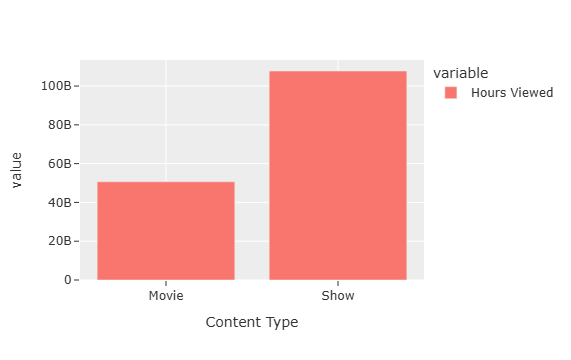

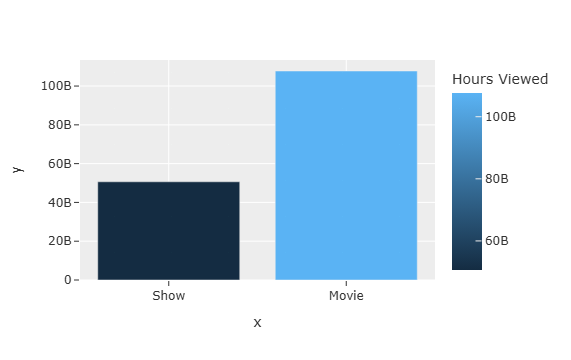

In [93]:
# Doing a simple bar graph with px

fig2 = px.bar(hourbytype, x=["Show", "Movie"], y = hourbytype.values, color='Hours Viewed' )
fig1 = px.bar(hbt)
fig1.show()
fig2.show()


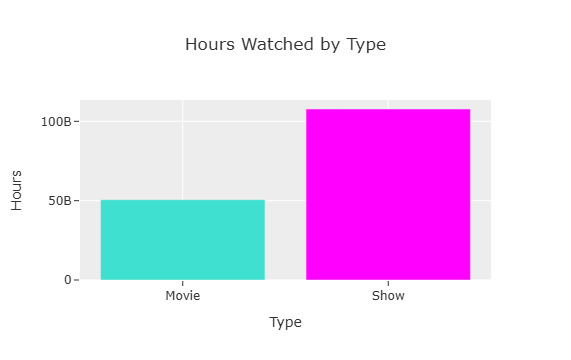

In [103]:
# Making a more complex bar chart with plotly go

fig3 = pgo.Figure(data=[pgo.Bar(x=hourbytype.index, y=hourbytype.values, marker_color=['turquoise', 'magenta'])])

fig3.update_layout(title='Hours Watched by Type', xaxis_title='Type', yaxis_title='Hours')

fig3.show()

In [109]:
# Grouping views by lang
viewbylang = ndata.groupby('Language Indicator')['Hours Viewed'].sum().sort_values()
viewbylang

Language Indicator
Russian           114600000
Hindi             926100000
Japanese         7102000000
Non-English     10439100000
Korean          15378400000
English        124441700000
Name: Hours Viewed, dtype: int64

In [111]:
# Experimenting
vbl = pd.DataFrame(viewbylang)
vbl

,Hours Viewed
Language Indicator,
Russian,114600000
Hindi,926100000
Japanese,7102000000
Non-English,10439100000
Korean,15378400000
English,124441700000


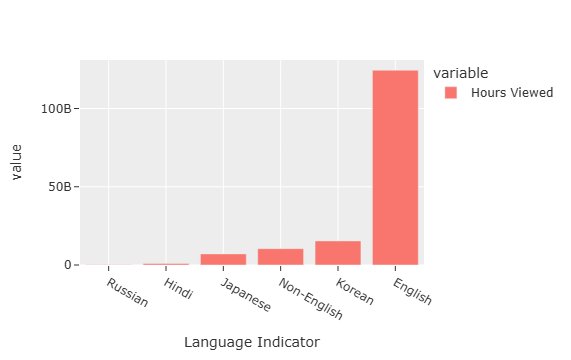

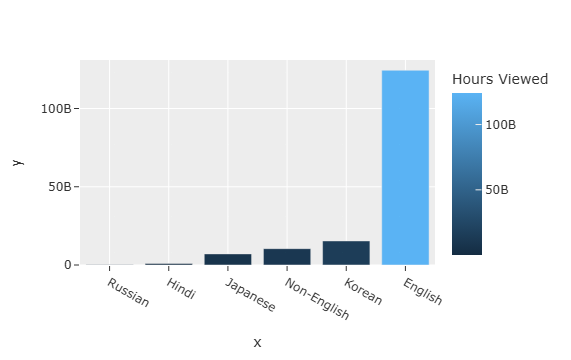

In [114]:
# Bar chart for views by lang

fig4 = px.bar(viewbylang,
              x=["Russian", "Hindi", "Japanese", "Non-English", "Korean", "English"],
              y = viewbylang.values, color='Hours Viewed')
fig5 = px.bar(vbl)
fig5.show()
fig4.show()

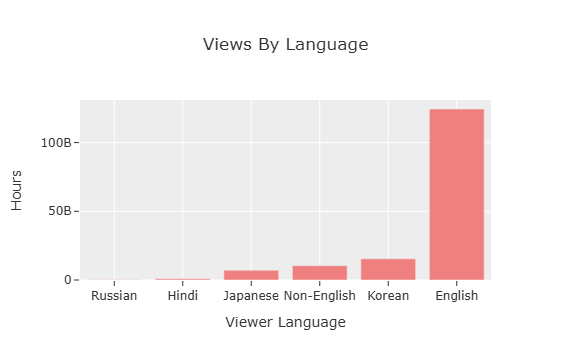

In [116]:
# More complex bar chart for lang views

fig6=pgo.Figure(data=[pgo.Bar(x=viewbylang.index, y=viewbylang.values,marker_color='lightcoral')])

fig6.update_layout(title='Views By Language',xaxis_title='Viewer Language',yaxis_title='Hours')

fig6.show()

In [169]:
# Finding date & seasonality patterns

# Changing string dates to datetime format
ndata['Release Date'] = pd.to_datetime(ndata['Release Date'])
# Get the months for each release
ndata['Release Month'] = pd.DatetimeIndex(ndata['Release Date']).month
ndata = ndata.sort_values(['Release Month'])


ndata


,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type,Release Month
1654,Black Lightning: Season 1,No,2018-01-23,12500000,English,Show,1.0
22822,Rita: Season 4,Yes,2018-01-15,1200000,English,Show,1.0
442,Ozark: Season 4,Yes,2022-01-21,38700000,English,Show,1.0
2346,You Cannot Hide: Season 1 // No te puedes esco...,No,2020-01-24,8600000,English,Show,1.0
22831,Bling Empire: Season 1,Yes,2021-01-15,1100000,English,Show,1.0
...,...,...,...,...,...,...,...
24800,Two Weeks to a Stronger Core: Volume 1,Yes,NaT,100000,English,Movie,NaN
24802,Vem Dançar com o Universo Z: Season 3,No,NaT,100000,Non-English,Show,NaN
24803,Vietnamese Horror Story: Season 1 // Chuyện ma...,No,NaT,100000,Non-English,Show,NaN
24807,We Are Black and British: Season 1,No,NaT,100000,English,Show,NaN


In [170]:
# View hours by month of release
viewrlmonth = ndata.groupby('Release Month')['Hours Viewed'].sum()
viewrlmonth
# Experimenting
vrm = pd.DataFrame(viewrlmonth)
vrm

,Hours Viewed
Release Month,
1.0,7271600000
2.0,7103700000
3.0,7437100000
4.0,6865700000
5.0,7094600000
6.0,8522000000
7.0,6524800000
8.0,6817800000
9.0,7262200000


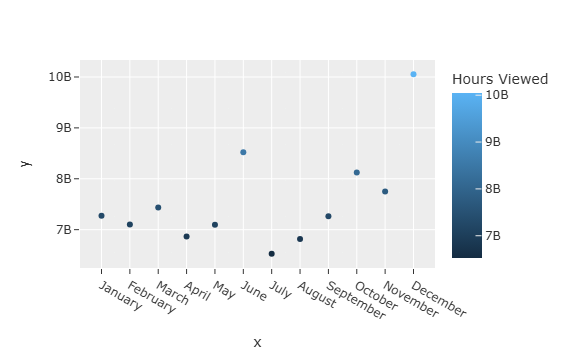

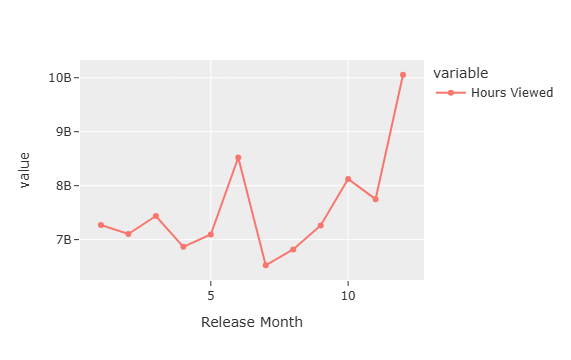

In [171]:
# Bar chart for views by month

fig7 = px.scatter(viewrlmonth,
              x=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"],
              y = viewrlmonth.values, color='Hours Viewed')
fig7.show()

fig8 = px.line(vrm, markers=True)
fig8.show()

In [172]:
# Doing it another way

ndata['Release Date'] = pd.to_datetime(ndata['Release Date'])

ndata['Release Month'] = ndata['Release Date'].dt.month

ndata


,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type,Release Month
1654,Black Lightning: Season 1,No,2018-01-23,12500000,English,Show,1.0
22822,Rita: Season 4,Yes,2018-01-15,1200000,English,Show,1.0
442,Ozark: Season 4,Yes,2022-01-21,38700000,English,Show,1.0
2346,You Cannot Hide: Season 1 // No te puedes esco...,No,2020-01-24,8600000,English,Show,1.0
22831,Bling Empire: Season 1,Yes,2021-01-15,1100000,English,Show,1.0
...,...,...,...,...,...,...,...
24800,Two Weeks to a Stronger Core: Volume 1,Yes,NaT,100000,English,Movie,NaN
24802,Vem Dançar com o Universo Z: Season 3,No,NaT,100000,Non-English,Show,NaN
24803,Vietnamese Horror Story: Season 1 // Chuyện ma...,No,NaT,100000,Non-English,Show,NaN
24807,We Are Black and British: Season 1,No,NaT,100000,English,Show,NaN


In [ ]:
# View hours by month of release
viewrlmonth = ndata.groupby('Release Month')['Hours Viewed'].sum()
viewrlmonth

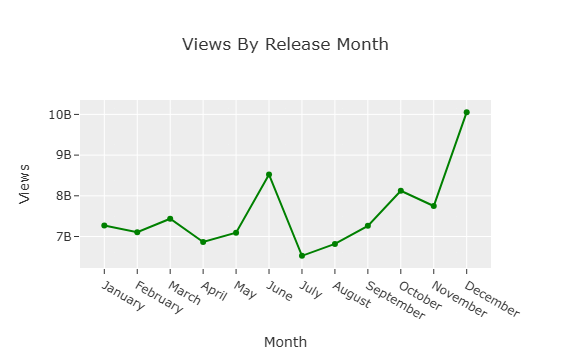

In [174]:
fig9 = pgo.Figure(data=[pgo.Scatter(x=viewrlmonth.index,y=viewrlmonth.values,
        mode='lines+markers',marker=dict(color='green'),line=dict(color='green'))])

fig9.update_layout(
    title='Views By Release Month',xaxis_title='Month',yaxis_title='Views',
    xaxis=dict(tickmode='array',tickvals=list(range(1, 13)),
               ticktext=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]))

fig9.show()